In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
 # 노트북을 실행한 브라우저에서 그래픽이 보이게 함
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [60]:
# DataFrame의 info()메소드를 통해 데이터 칼럼 타입을 확인할 수 있다.
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [61]:
#RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 row 수를 알 수있다. 
# 사이킷런의 머신러닝 알고리즘은 Null값을 허용하지 않으므로 Null값을 처리할지 결정해야 한다.
# DataFrame()의 fillna() 함수를 사용해 Null 또는 다른 값으로 변경한다.
# Age는 평균으로, 나머지는 'N'으로 변경한다.

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


In [62]:
# String features의 경우 Sex, Cabin, Embarked인데,
print(titanic_df['Sex'].value_counts())


male      577
female    314
Name: Sex, dtype: int64


In [63]:
print(titanic_df['Cabin'].value_counts())

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64


In [64]:
print(titanic_df['Embarked'].value_counts())

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [65]:
# Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다. 앞 문자만 추출해 본다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [66]:
#성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 본다.
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

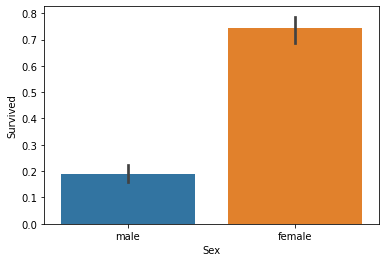

In [67]:
# 시각화를 위해 seaborn 패키지를 이용한다.
sns.barplot(x='Sex', y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

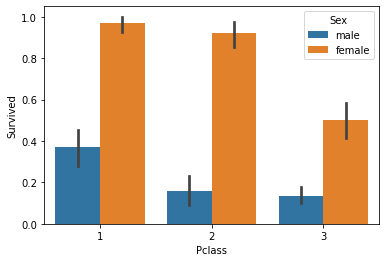

In [68]:
# Pclass에 따라 생존 확률을 알아 본다.
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)
# hue 파라미터: 색깔로 구분함
# 여성일 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존확률이 떨어짐을 알 수 잇다. 
# 남성은 일등실의 생존확률이 이,삼등실의 그것보다 높다.

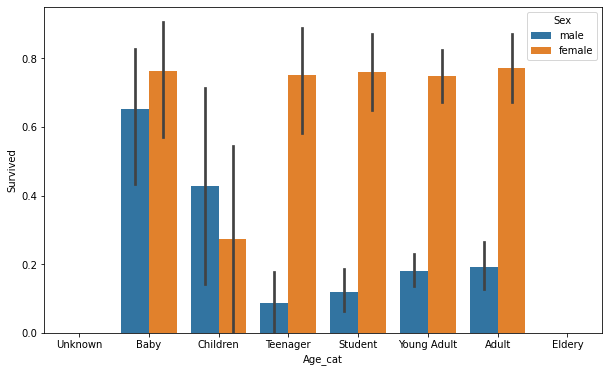

In [69]:
#이번에 age에 따른 생존확률을 알아보겟습니다.
# 범위 별로 분류해 카테고리 값을 할당하겠습니다.
def get_category(age):
    cat = ''
    if age<=-1: cat = 'Unknown'
    elif age<=5: cat = 'Baby'
    elif age<=12: cat = 'Children'
    elif age<=18: cat = "Teenager"
    elif age<=25: cat=  'Student'
    elif age<=35: cat ='Young Adult'
    elif age<=60: cat = 'Adult'
    elif age>61: 'Elderly' # else : cat = 'Eldery'
    return cat

# 그래프의 크기 설정 => 크기를 크게 함
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위해
groups_names = ['Unknown','Baby','Children','Teenager','Student','Young Adult', 'Adult','Eldery']
#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
#Age_Cat 칼럼의 값 1 건이 x로 입력이 되고 함수 get_category의 인자로 사용된다.
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=groups_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)
#apply(lambda)식을 하겠다는 것은 한 개의 레코드(로우) 별로 체크를 해서 반환하겠다는 의미입니다.
#pandas DF는 기본적으로 레코드 단위

In [70]:
# 이제 Sex, Age, Pclass등이 중요하게 생존을 좌우하는 feature임을 알았습니다. 문자열 카테고리를 숫자형 카테고리로 변환합니다.
# 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용하겠습니다.
# 여러 칼럼을 한번에 인코딩 하기 위해 함수 encode_features() 를 생성한다.
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF
titanic_df = encode_features(titanic_df)
# 이제 문자열 카테고리가 숫자형 카테고리로 변환되었다.

In [71]:
# feature들을 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만든다.
#데이터의 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null처리,포매팅,인코딩을 수행하는 함수로 구성했다.

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#데이터 전처리를 수행하는 transform_features()함수를 만들었으니 이 함수를 이용해 다시 원본 데이터를 가공하겠습니다.
# 원본 csv 파일을 다시 로딩하고 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들겠습니다.
# 그리고 Survived 속성을 드롭해 피처 데이터 세트를 만들겠습니다. 
# 생성된 feature data set에 transform_features()를 적용해 데이터를 가공합니다.

In [72]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)

In [73]:
# 이제 train_test_split() API를 이용해 별도의 테스트 데이터 셋을 추출합니다.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_titanic_df, y_titanic_df,test_size=0.2,random_state=11)


In [74]:
# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용한다. 
# 사이킷런 클래스를 이용해 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고 예측한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(x_train,y_train)
rf_pred = rf_clf.predict(x_test)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

결정트리 정확도: 0.7877
랜덤 포레스트 정확도: 0.8547
로지스틱 회귀 정확도: 0.8492


C:\Users\eunse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# 세 개의 알고리즘 중 LogisticRegression이 높은 정확도를 나타내고 있습니다. 
# 다음으로 교차 검증을 통해 결정드리 모델을 평가하게씁ㄴ디ㅏ.

In [78]:
# 먼저 KFold클래스를 사용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정합니다.
from sklearn.model_selection import KFold
def exec_kfold(clf,folds=5):
    #폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    #교차 검증 수행
    for iter_count,(train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train,x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
    mean_score = np.mean(scores)
    print('평균 정확도:{0:.4f}'.format(mean_score))
    
    
exec_kfold(dt_clf, folds=5)

평균 정확도:0.7823


In [79]:
# 이번에는 cross_val_score()API를 이용해 수행합니다.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도{0:.4f}'.format(iter_count, accuracy))
    
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도0.0000
교차 검증 1 정확도1.0000
교차 검증 2 정확도2.0000
교차 검증 3 정확도3.0000
교차 검증 4 정확도4.0000
평균 정확도:0.7879


In [80]:
# 마지막으로 GridSearchCV를 사용해 결정트리의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정하겠습니다.
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')